# **Exploração e análise de dados de crédito com SQL**
Esse notebook faz parte do curso SQL para análise de dados da EBAC.

**Os dados:**

Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: 
https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **Exploração de dados:**

A primeira fase da análise é entender o que tem nos nossos dados e assim iniciar a exploração de dos mesmos. Sendo primordial ver o tamanho do arquivo/quantidade de linhas.

Entao utilizando o Athena vamos a primeira pergunta.

**Qual a quantidade de informações temos na nossa base de dados?**

**Query: SELECT count(*) FROM credito8**

> Reposta: 2564 linhas
 
**ps.:** A base de dados do link acima contém mais linhas do que a seleção utilizada. Você pode utilizar todas as linhas ou considerar apenas uma fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo se torna interessante.

Como os dados abaixo:

**Consulta**: SELECT * FROM credito8 LIMIT 10;

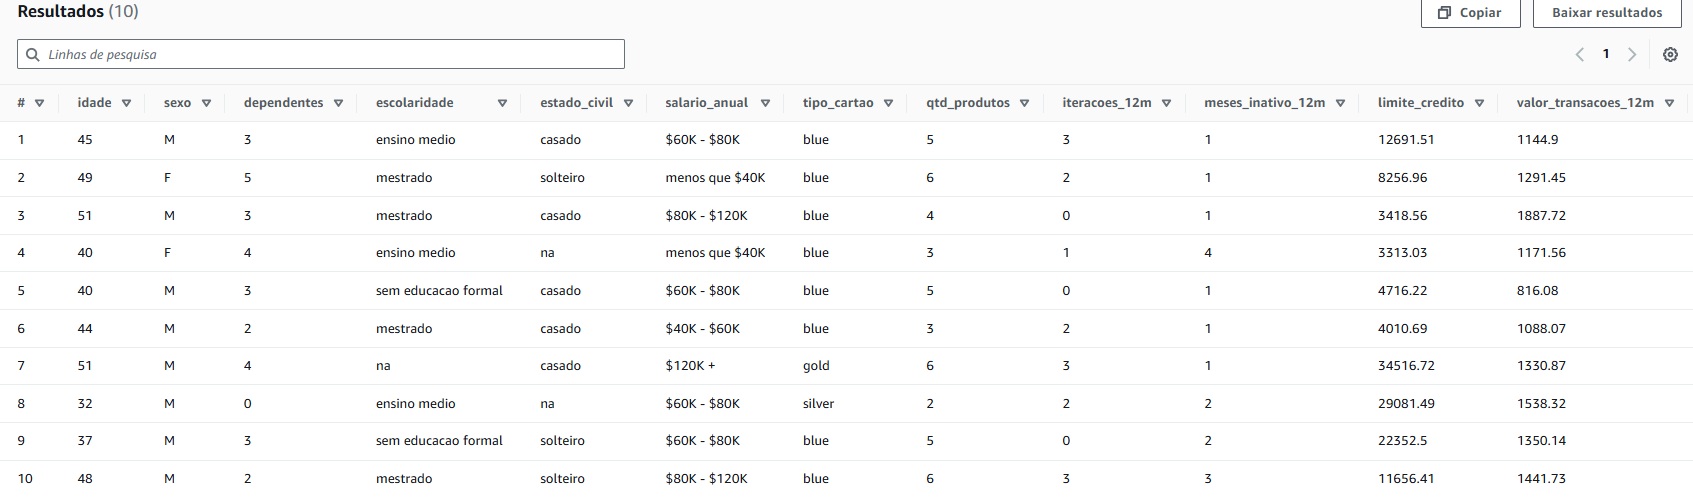

> É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna!  

**Quais são os tipos de dados de cada coluna?**

**Consulta:** DESCRIBE credito8

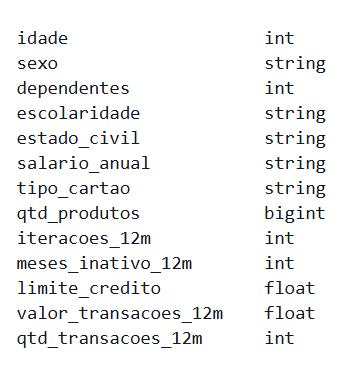

Com isso podemos perceber qual é o tipo de dado em cada coluna da tabela, se é *int*, *float*, *bigint* ou *string*.

Vamos olhar atentamente para as variáveis que não são numéricas, os *strings*.

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Consulta:** SELECT DISTINCT escolaridade FROM credito8

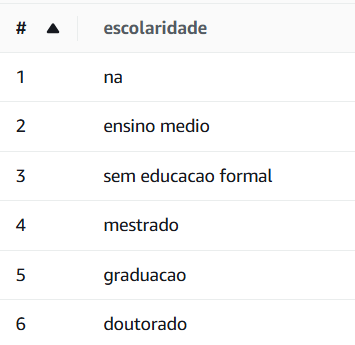

> Os dados contam com vários níveis de escolaridade e é possível perceber que temos valores nulos (na) no dataset, trataremos isso mais tarde!

Será que temos mais valores nulos?

**Quais são os tipos de estado_civil disponíveis no dataset?**

**Conculta:** SELECT DISTINCT estado_civil FROM credito8

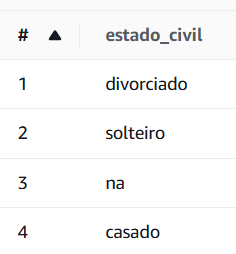

> Novamente encontramos valores nulos nos dados de estado civil!

**Quais são os tipos de salario_anual disponíveis no dataset?**

**Conculta:** SELECT DISTINCT salario_anual FROM credito8

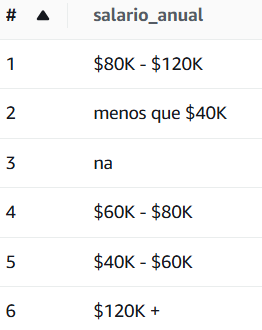

Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.

**Quais são os tipos de cartão disponíveis no dataset?**

**Conculta:**: SELECT DISTINCT tipo_cartao FROM credito8

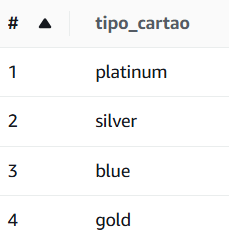

Aqui vemos que não há necessidade de tratar valores nulos, pois não há nenhum valor nulo.



# Análise de dados

Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. 

**Nesse banco de dados, quantos clientes temos de cada faixa salarial?**

**Consulta:** select count(*), salario_anual from credito group by salario_anual

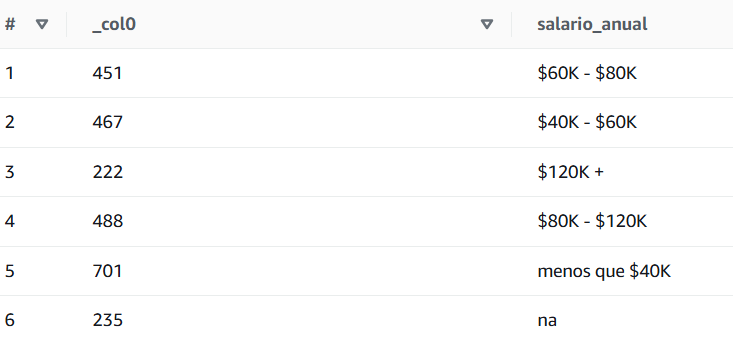

> A maioria dos clientes dessa base de dados possui um renda inferior a 40K e existem 235 clientes que não informaram a sua renda ou não consta a faixa salarial.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

**Consulta:** select count(*), sexo from credito group by sexo

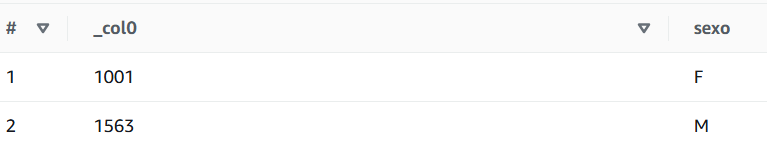

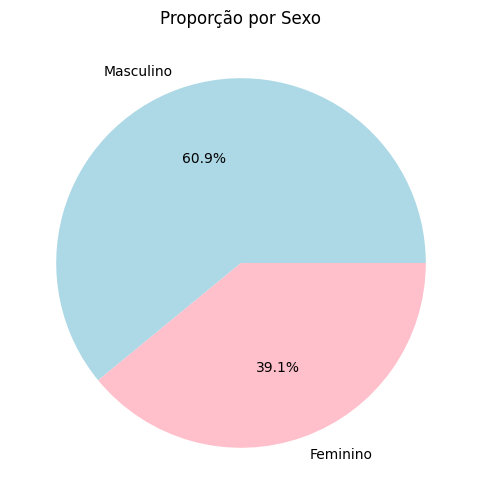

> A maioria dos clientes desse banco é homem! Do csv extraído dos dados é possível gerar o gráfico em pizza com para melhor a proporção de masculino/feminino

**Quais as características dos clientes que possuem os maiores creditos?**

**Consulta:**  select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito8
where escolaridade != 'na' and tipo_cartao != 'na' 
group by escolaridade, tipo_cartao, sexo 
order by limite_credito desc 
limit 10

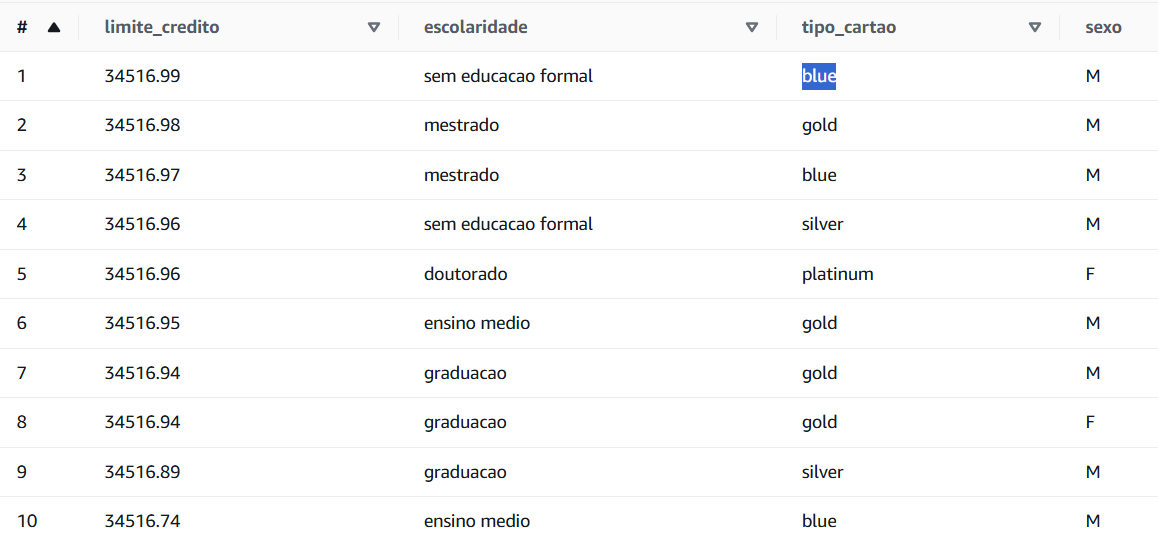

> A escolaridade não aparenta influenciar diretamente o limite de crédito. O maior limite foi concedido a um homem sem educação formal. Além disso, não há uma relação clara entre a escolaridade e o tipo de cartão ou o limite oferecido. Entre os maiores limites, estão clientes com cartões das categorias gold, silver, platinum e blue.

**Quais as características dos clientes que possuem os menores creditos?**

**Consulta:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo 
from credito8
where escolaridade != 'na' and tipo_cartao != 'na' 
group by escolaridade, tipo_cartao, sexo 
order by limite_credito asc

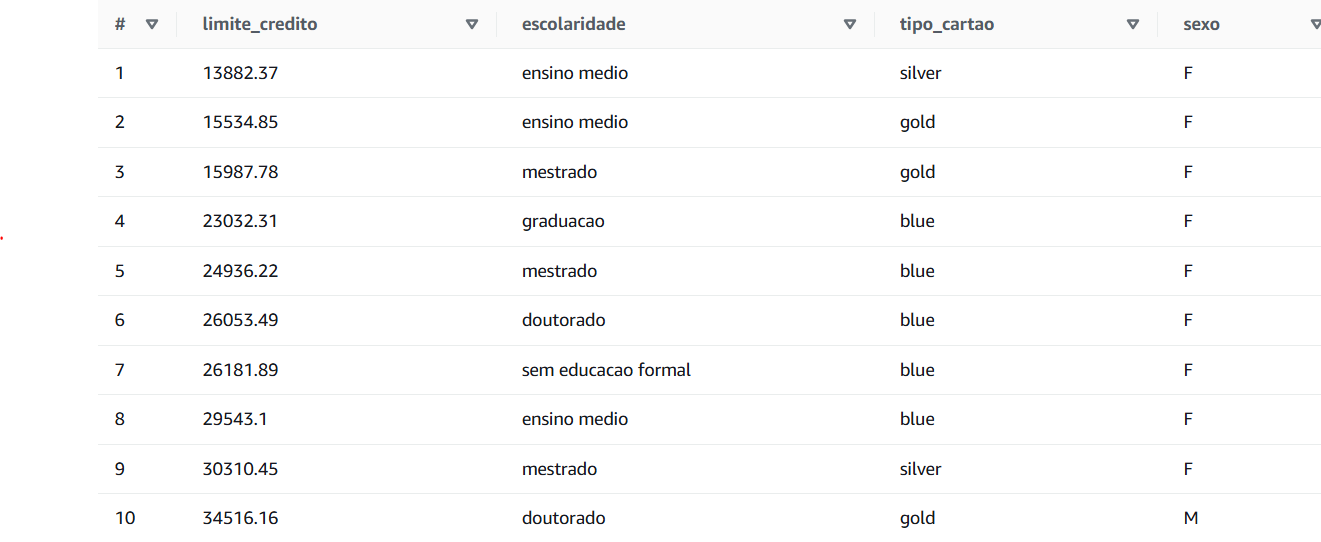

> Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.

**Quem sao os clientes com os maiores gastos, homens ou mulheres?**

**Consulta:** select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo 
from credito8 
group by sexo

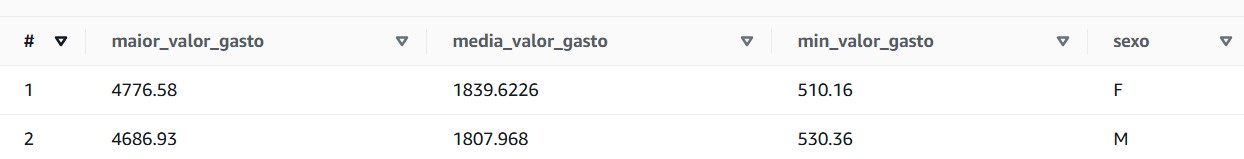

> Apesar da diferença nos limites, os gastos de homens e mulheres são similares!

**O salário impacta no limite?**

**Consulta:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual 
from credito8 
where salario_anual != 'na' 
group by sexo, salario_anual 
order by avg(valor_transacoes_12m) desc

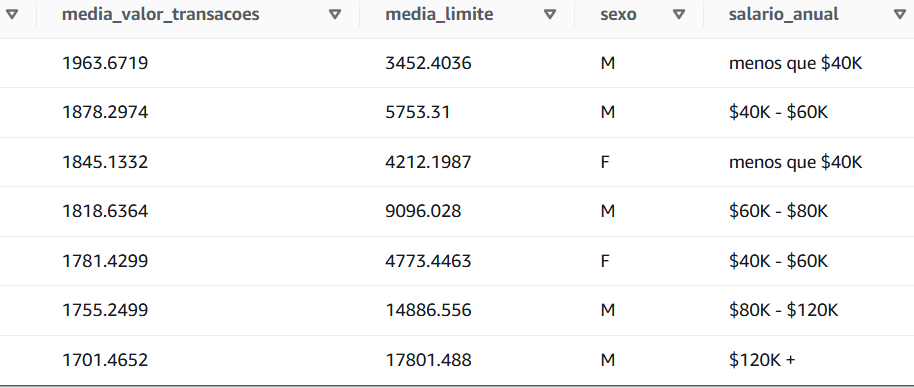

> SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!

# Conclusão
Essas foram algumas análises extraídas do dataset de crédito.

Alguns insights interessantes:

* a maior parte dos clientes possui renda até 40K
* a maior parte dos clientes é masculino!
* a escolaridade não parece influenciar no limite nem no tipo do cartão
* os clientes com maiores limites são em sua maioria homens
* os clientes com menores limites são em sua maioria mulheres
* dentre os menores limites não há presença de cartão platinum
* a faixa salarial impacta diretamente no limite de crédito


***Devido as mulheres terem uma menor media salarial isso impacta e pode explicar o motivo das mesmas terem o menor crédito.***